In [1]:
import pandas as pd
features=pd.read_csv('data.csv',sep=";")
features

,pd,pm,pa,resultat
0,6.8390,6.9600,6.85000,1
1,6.3200,6.4250,5.50000,0
2,6.6850,6.4662,5.49900,0
3,6.8660,6.5000,6.96300,1
4,6.7650,6.5852,5.12300,0
...,...,...,...,...
139,6.4770,6.6230,8.22680,1
140,6.8560,6.7552,8.78569,1
141,6.4580,6.5211,6.22700,0
142,6.5629,6.6260,6.32000,0


In [2]:
features.shape


(144, 4)

In [3]:
features.describe()

,pd,pm,pa,resultat
count,144.00000,144.000000,144.000000,144.000000
mean,6.61868,6.610351,6.711068,0.506944
std,0.58661,0.331625,0.707967,0.501697
min,5.99920,5.497000,5.123000,0.000000
25%,6.12225,6.519000,6.224150,0.000000
50%,6.52215,6.565500,6.753200,1.000000
75%,6.78640,6.608250,6.963000,1.000000
max,8.78020,8.550000,8.965000,1.000000


In [4]:
features.info

<bound method DataFrame.info of          pd      pm       pa  resultat
0    6.8390  6.9600  6.85000         1
1    6.3200  6.4250  5.50000         0
2    6.6850  6.4662  5.49900         0
3    6.8660  6.5000  6.96300         1
4    6.7650  6.5852  5.12300         0
..      ...     ...      ...       ...
139  6.4770  6.6230  8.22680         1
140  6.8560  6.7552  8.78569         1
141  6.4580  6.5211  6.22700         0
142  6.5629  6.6260  6.32000         0
143  6.1013  6.9870  6.22720         0

[144 rows x 4 columns]>

In [5]:
import numpy as np 
y=np.array(features["resultat"])
x=features.drop('resultat',axis=1)
features_list=list(x.columns)
x=np.array(x)

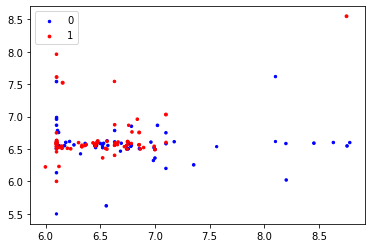

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x[y == 0][:,0],x[y==0][:,1],x[y==0][:,2],color="b",label="0")
plt.scatter(x[y == 1][:,0],x[y==1][:,1],x[y==1][:,2],color="r",label="1")
plt.legend();

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [9]:
from sklearn import metrics 
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.6818181818181818


[0.         0.39130435 1.        ] [0.         0.76190476 1.        ]


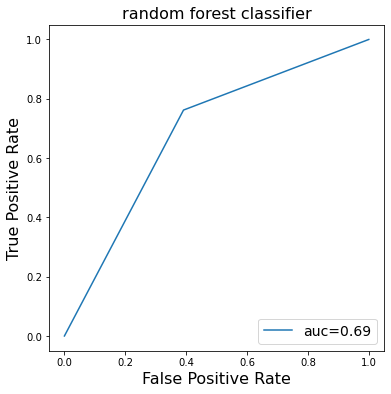

In [11]:
from sklearn import metrics
from sklearn.metrics import auc,roc_curve
from matplotlib import pyplot as plt

fpr,tpr,thr = roc_curve(y_test,y_pred)
print(fpr,tpr)
auc=auc(fpr,tpr)

fig=plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,'-',label='auc=%.2f' % auc)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("random forest classifier",fontsize=16)
plt.legend(loc="lower right",fontsize=14)
plt.show()